In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import data

In [2]:
audiopaths,midipaths=data.pathscan()
print(f'There are {len(audiopaths)} audiofiles,\nThere are {len(midipaths)} midifiles.')

csv=data.get_csv()

There are 45537 audiofiles,
There are 45537 midifiles.
rows 	 [    0     1     2 ... 45534 45535 45536]
columns 	 ['drummer' 'session' 'id' 'style' 'bpm' 'beat_type' 'time_signature'
 'duration' 'split' 'midi_filename' 'audio_filename' 'kit_name']


In [3]:
import paths
midisample,audiosample=paths.sample_files()
print(midisample,"\n",audiosample)

/data/pl/samples/220_rock-halftime_140_fill_4-4_6.midi 
 /data/pl/samples/220_rock-halftime_140_fill_4-4_6.wav


In [6]:
import librosa

#define analysis parameters
def analysis_parameters():
    sampling_rate=16000  #for instance: if mode 16, sr = 16kHz
    window_size = sampling_rate
    overlap = int(window_size*0.75)
    hop_length = (window_size-overlap)
    return sampling_rate, window_size, hop_length

def _windows(data, window_size, hop_length):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += hop_length
                    
#sampling_rate=16000
raw, sr =librosa.load(audiosample, sr=sampling_rate, mono=True)
print(raw.shape)

frames = []
#get windows out of the raw waveform
for count_frames,(start,end) in enumerate(_windows(raw,window_size,hop_length)):
if(len(raw[start:end]) == window_size):
    print(start,end)
    frame = raw[start:end]#rectangular window
            



def preprocess_data(audio_path, folds, files, mode):
    
  def _windows(data, window_size, hop_length):
    start = 0
    while start < len(data):
      yield start, start + window_size
      start += hop_length

  def normalize(data):#in the space [-1,1]
    #return (data - np.min(data)) / (np.max(data) - np.min(data))#[0,1]
    return (2*(data-np.min(data))/(np.max(data) - np.min(data)))-1
  

  features = []
 
  extr = True
  if extr == True:
    
    print('Preprocessing data ........ ')
    
    sampling_rate, window_size, hop_length = analysis_parameters(mode)
    print(f'sampling_rate: {sampling_rate}, window_size: {window_size}, hop_length: {hop_length}')

    shape_print=True


    for count_files, file in tqdm(enumerate(audiofiles)):
      name = file.split('.wav')[0]

      #readfile
      raw, sr =librosa.load(audio_path+file, sr=sampling_rate, mono=True)
      #print(f'{file} had length {len(raw)}')

      #normalize
      raw = normalize(raw)
      
      frames = []
      #get windows out of the raw waveform
      for count_frames,(start,end) in enumerate(_windows(raw,window_size,hop_length)):
        if(len(raw[start:end]) == window_size):
          #print(start,end)
          frame = raw[start:end]#rectangular window

          #flatten
          #implemented inside the model

          frames.append(frame)
      
      features.append(frames)
     

      if shape_print:
            print('\nFeature Shape Check\n')
            print(f'raw has len:{len(raw)/sampling_rate}')
            print(f'Postprocessed feature has shape : {np.asarray(features).shape} with min:{np.asarray(features[0]).min()} and max:{np.asarray(features[0]).max()}]')
            print()
            shape_print = False

  #'''
  print('len(features)-features',len(features))
  print('len(features[0])-freq_domain',len(features[0]))
  print('labels',len(labels))
  #'''
  return features

#get analysis parameters
sampling_rate, window_size, hop_length = analysis_parameters(mode)
print(f'sampling_rate: {sampling_rate}, window_size: {window_size}, hop_length: {hop_length}')

#extract_features       
features = preprocess_data(audio_path, folds, audiofiles, mode)
#features, labels, folders = extract_mel_spectogram(audio_path,us8k,folds,audiofiles,sampling_rate,hop_length,fft_points,mel_bands)
print(f' feature\'s len : {len(features)}, labels : {len(labels)}, folders : {len(folders)}')

(54858,)


In [22]:
###Audio-data analysis

In [23]:
print(csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45537 entries, 0 to 45536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         45537 non-null  object 
 1   session         45537 non-null  object 
 2   id              45537 non-null  object 
 3   style           45537 non-null  object 
 4   bpm             45537 non-null  int64  
 5   beat_type       45537 non-null  object 
 6   time_signature  45537 non-null  object 
 7   duration        45537 non-null  float64
 8   split           45537 non-null  object 
 9   midi_filename   45537 non-null  object 
 10  audio_filename  45537 non-null  object 
 11  kit_name        45537 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.2+ MB
None


In [24]:
#styles dist
styles=csv['style'].values
unq_styles=csv['style'].unique()
#print(unq_styles)
#print(type(styles))
#print(len(styles))

#beats per seconds dist
bpms=csv['bpm'].values
#print(type(bpms))
#print(len(bpms))

beatfill=csv['beat_type'].values
#print(beatfill)
unq_beatfill=csv['beat_type'].unique()
#print(unq_beatfill)

#Durations
durations=csv['duration'].values
unq_durations=csv['duration'].unique()
print(len(durations))
print(len(unq_durations))

splits=csv['split'].values
print(splits)

45537
7636
['test' 'test' 'test' ... 'validation' 'validation' 'validation']


In [25]:
#Audio-technical specification analysis
#44100
#24bit

In [26]:
split_bpm_mean_dist=csv.groupby(['split'])['bpm'].mean()
split_bpm_std_dist=csv.groupby(['split'])['bpm'].std()
print(f'split_bpm_mean_dist : {split_bpm_mean_dist}\n')
print(f'split_bpm_std_dist : {split_bpm_std_dist}')

split_bpm_mean_dist : split
test          104.520325
train         109.975580
validation    114.170940
Name: bpm, dtype: float64

split_bpm_std_dist : split
test          22.254664
train         24.280947
validation    22.673931
Name: bpm, dtype: float64


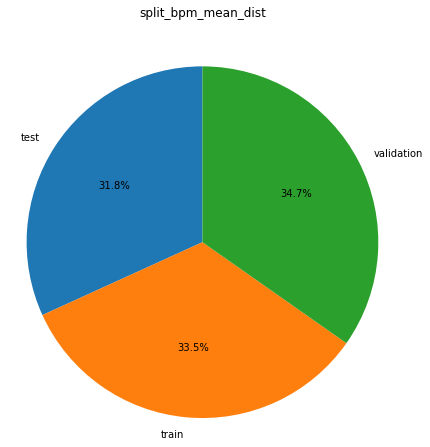

In [27]:
#ERASEEEEEEE
fig ,ax = plt.subplots(figsize=(7,7))
ax.set_title('split_bpm_mean_dist', y=1.08)
ax.pie(split_bpm_mean_dist, labels=split_bpm_mean_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37,data=split_bpm_mean_dist)
ax.axis('equal')#circle
plt.show()

In [ ]:
#ERASEEEEEEE
# Plot Class_dist
fig ,ax = plt.subplots(figsize=(7,7))
ax.set_title('split_bpm_std_dist', y=1.08)
ax.pie(split_bpm_std_dist, labels=split_bpm_std_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [8]:
csv.groupby(['bpm'])['split'].count()

bpm
50      43
60     344
63     344
64      43
65     172
      ... 
185     43
190     43
200     86
215    258
290     43
Name: split, Length: 72, dtype: int64

NameError: name 'class_dist' is not defined

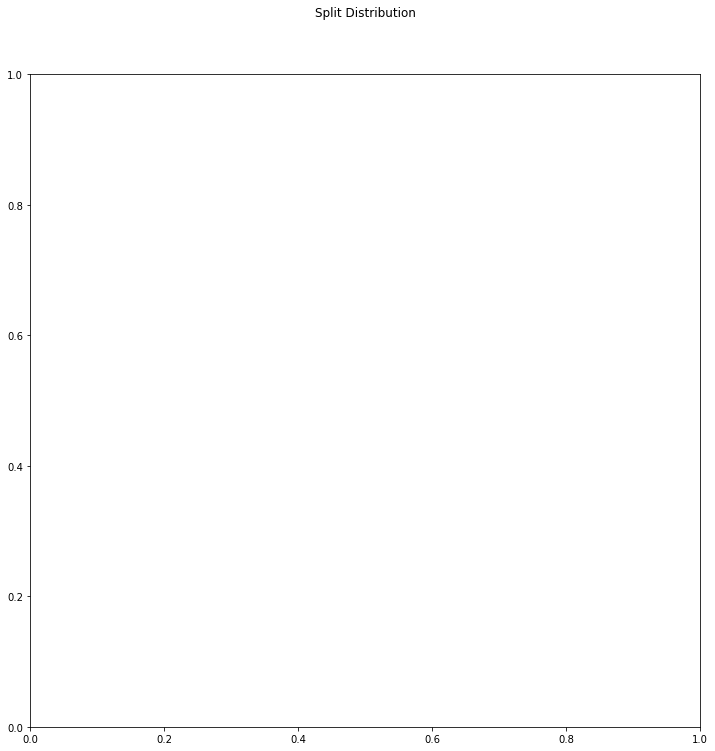

In [9]:
# Plot class distribution
import matplotlib.pyplot as plt
fig ,ax = plt.subplots(figsize=(12,12))
ax.set_title('Split Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [7]:
###Midi-data analysis

In [10]:
print(midipaths[0])

/data/pl/e-gmd/drummer1/eval_session/10_soul-groove10_102_beat_4-4_1.midi


In [15]:
import mido as md

mid = md.MidiFile("/data/pl/samples/220_rock-halftime_140_fill_4-4_6.midi", clip=True)#midipaths[0]
print(mid)

<midi file '/data/pl/samples/220_rock-halftime_140_fill_4-4_6.midi' type 1, 2 tracks, 30 messages>


In [16]:
for track in mid.tracks:
    print(track)

<midi track '' 4 messages>
<midi track '' 26 messages>


In [19]:
for msg in mid.tracks[0]:
    print(msg)
    print(type(msg))

<meta message set_tempo tempo=428571 time=0>
<class 'mido.midifiles.meta.MetaMessage'>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<class 'mido.midifiles.meta.MetaMessage'>
<meta message key_signature key='C' time=0>
<class 'mido.midifiles.meta.MetaMessage'>
<meta message end_of_track time=1>
<class 'mido.midifiles.meta.MetaMessage'>


In [23]:
for msg in mid.tracks[1]:
    #print(msg)
    msg=str(msg)
    print(msg.split(' ')[0])
    #parse string message to store annotations {1.note = the drum comp class, 2.velocity , 3.time)
    
    #print(type(msg))

program_change
control_change
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
note_on
control_change
<meta


In [13]:
cv1 = md.MidiFile('sample.midi', clip=True)

message_numbers = []
duplicates = []

for track in cv1.tracks:
    print(track)
    print(len(track))
    if len(track) in message_numbers:
        duplicates.append(track)
    else:
        message_numbers.append(len(track))

for track in duplicates:
    print(track)
    cv1.tracks.remove(track)

#cv1.save('new_song.mid')


<midi track '' 4 messages>
4
<midi track '' 9904 messages>
9904
